<h1>Cohort Analysis</h1>
<ul>
<li><a href = 'https://www.stitchdata.com/cohort-analysis/'>First Reference for theory</a></li>
<li><a href = 'https://campus.datacamp.com/courses/customer-segmentation-in-python/cohort-analysis?ex=11'>Second Reference for Excercise</a></li>
 </ul>



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_excel('my_data.xlsx')

In [49]:
data.head()

,Order Id,OrderDate,UserId,Total Charges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [50]:
data.describe()

,Order Id,UserId,Total Charges,PupId
count,732.000000,732.000000,732.000000,732.000000
mean,1156.586066,2424.724044,68.858251,4.938525
std,816.399174,2158.433177,58.552453,3.649529
min,256.000000,47.000000,2.030000,2.000000
25%,474.500000,253.000000,27.602500,3.000000
50%,886.500000,2195.000000,52.060000,4.000000
75%,1597.750000,4622.000000,89.645000,5.000000
max,3226.000000,6012.000000,390.069200,18.000000


In [51]:
data.columns

Index(['Order Id', 'OrderDate', 'UserId', 'Total Charges', 'CommonId', 'PupId',
       'PickupDate'],
      dtype='object')

### we are making a column named ordercycle which shows in which year user order first

In [52]:
data['OrderCycle'] = data.OrderDate.apply(lambda x: x.strftime('%Y-%m'))

In [53]:
data['OrderCycle']

0      2009-01
1      2009-01
2      2009-02
3      2009-02
4      2009-02
        ...   
727    2009-04
728    2009-04
729    2009-06
730    2009-11
731    2009-04
Name: OrderCycle, Length: 732, dtype: object

In [54]:
data.head()

,Order Id,OrderDate,UserId,Total Charges,CommonId,PupId,PickupDate,OrderCycle
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [55]:
data.set_index('UserId', inplace=True)

In [59]:


data['CohortGroup'] = data.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
data.reset_index(inplace=True)
data.head()

,UserId,Order Id,OrderDate,Total Charges,CommonId,PupId,PickupDate,OrderCycle,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [62]:
grouped = data.groupby(['CohortGroup', 'OrderCycle'])

cohorts = grouped.agg({'UserId': pd.Series.nunique,
                       'Order Id': pd.Series.nunique,
                       'Total Charges': np.sum})
cohorts.rename(columns={'UserId': 'TotalUsers',
                        'Order Id': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders  Total Charges
CohortGroup OrderCycle                                        
2009-01     2009-01             22           30       1850.255
            2009-02              8           25       1351.065
            2009-03             10           26       1357.360
            2009-04              9           28       1604.500
            2009-05             10           26       1575.625

In [63]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  TotalOrders  Total Charges  CohortPeriod
CohortGroup OrderCycle                                                      
2009-01     2009-01             22           30       1850.255             1
            2009-02              8           25       1351.065             2
            2009-03             10           26       1357.360             3
            2009-04              9           28       1604.500             4
            2009-05             10           26       1575.625             5

In [64]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)


cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    19
2009-05     8
Name: TotalUsers, dtype: int64

In [65]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-12,2010-01,2010-02
CohortPeriod,,,,,,,,
1,22.0,15.0,13.0,19.0,8.0,1.0,1.0,2.0
2,8.0,3.0,4.0,8.0,2.0,1.0,NaN,NaN
3,10.0,5.0,5.0,6.0,1.0,NaN,NaN,NaN
4,9.0,1.0,4.0,9.0,1.0,NaN,NaN,NaN
5,10.0,4.0,1.0,3.0,2.0,NaN,NaN,NaN


In [66]:
user_evaluation = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_evaluation.head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-12,2010-01,2010-02
CohortPeriod,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000,1.0,1.0,1.0
2,0.363636,0.200000,0.307692,0.421053,0.250,1.0,NaN,NaN
3,0.454545,0.333333,0.384615,0.315789,0.125,NaN,NaN,NaN
4,0.409091,0.066667,0.307692,0.473684,0.125,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.157895,0.250,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.210526,0.250,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.105263,0.125,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.210526,0.125,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.052632,0.125,NaN,NaN,NaN


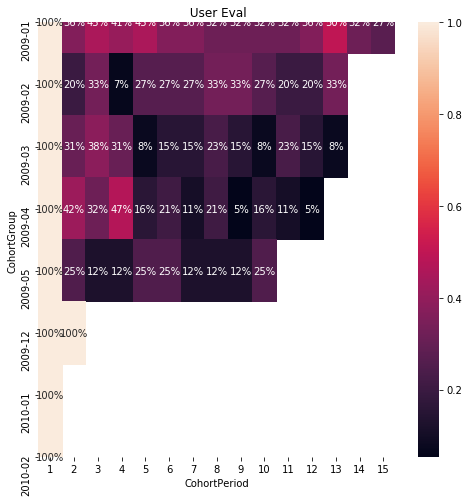

In [70]:
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.title(' User Eval')
sns.heatmap(user_evaluation.T, mask=user_evaluation.T.isnull(), annot=True, fmt='.0%')